## Sanity check
In this notebook, I ran the [JPL Horizons Web Interface](https://ssd.jpl.nasa.gov/horizons.cgi#results) to compute the airmass of given cities on Earth as seen by TESS throughout Sector 1. I found the cities whose airmass was closest to 1 on several dates, and independently used `earthshine` to visualize what the Earth looks like to TESS on those dates. The agreement is perfect!

For reference, here's an example of the settings I used for one of the cities:

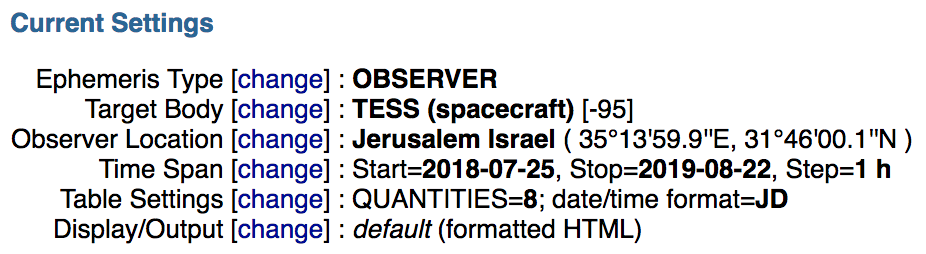

In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [3]:
import earthshine
import starry_beta
import starry
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

In [4]:
# Load the Ylm expansion of the Earth
earth = np.asarray(Image.open("../data/earth.jpg"))
earth = ndimage.gaussian_filter(earth, sigma=5)
earth = (earth - np.nanmin(earth)) / (np.nanmax(earth) - np.nanmin(earth))
map_ = starry_beta.Map(30)
map_.load_image(earth)
yearth = np.array(map_.y)
map = starry.Map(30, reflected=False, nt=1)
map[:, :, 0] = yearth

In [5]:
def view(jd, title=None):
    # Get tess date
    tjd = jd - 2457000.0
    
    # Get the image
    phase0 = -56.5
    time0 = 1325.5
    Z = earthshine.render(map, tjd, time0=time0, phase0=phase0, res=150, period=0.9972696)
    Z = np.array(Z)
    Z /= np.nanmax(Z)
    vmin = np.nanmin(Z)
    vmax = 1

    # Plot it
    fig, ax = plt.subplots(1, figsize=(3, 3))
    cmap = plt.get_cmap("plasma")
    cmap.set_under((0.0, 0.0, 0.0, 1.0))
    cmap.set_bad((1.0, 1.0, 1.0, 1.0))
    img = np.array(Z)
    img[img == 0] = -1
    ax.imshow(img, origin="lower", cmap=cmap, vmin=vmin, vmax=vmax, extent=(-1, 1, -1, 1))
    ax.plot(0, 0, 'ro')
    ax.axis('off');
    
    if title is not None:
        ax.set_title(title, fontsize=12)

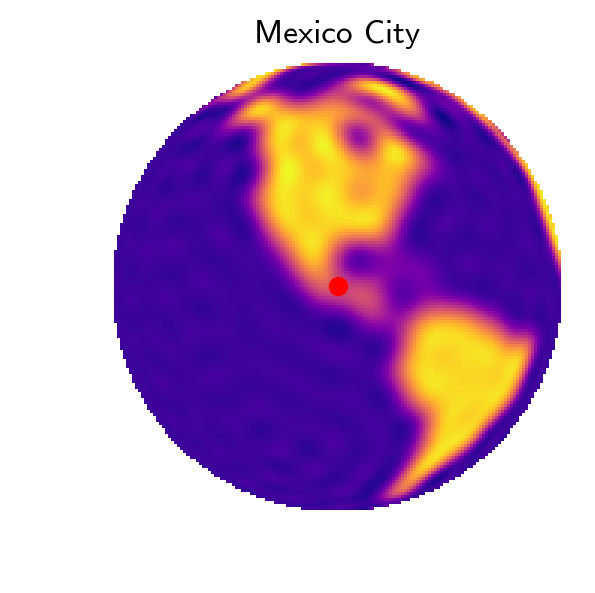

In [6]:
# Day 4
# Airmass 1.002
view(2458328.1250000000, "Mexico City")

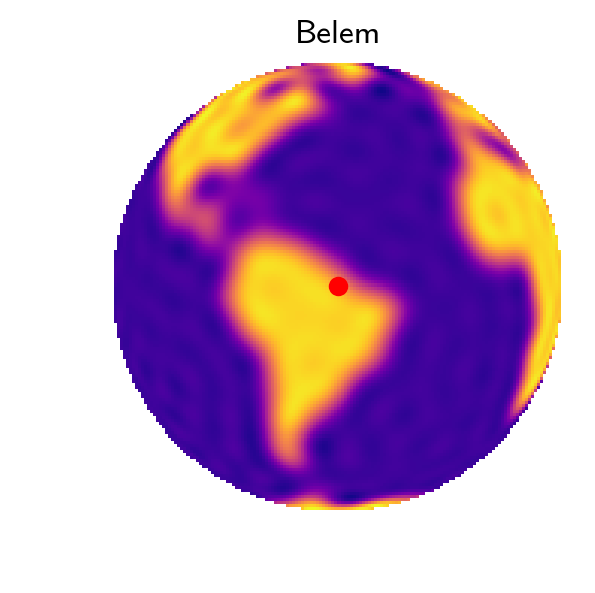

In [7]:
# Day 8
# Airmass 1.001
view(2458332.083, "Belem")

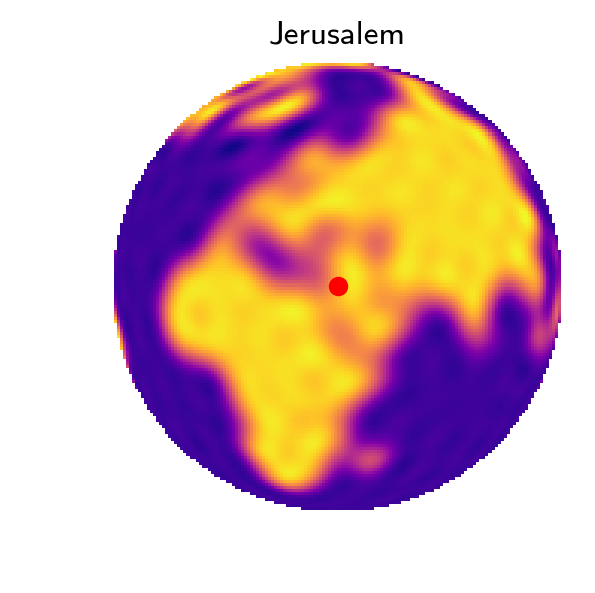

In [8]:
# Day 17
# Airmass 1.000
view(2458340.583333333, "Jerusalem")

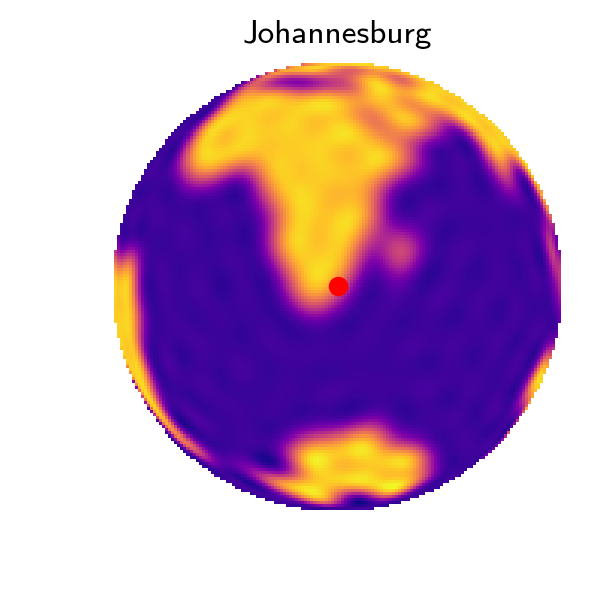

In [9]:
# Day 29
# Airmass 1.001
view(2458365.958333333, "Johannesburg")